# Pandas
- The most used scientific/data library in Python
- Uses Numpy as its base for mathematical operations
- Working with Series and Data Frames

In [45]:
# Pandas alias is pd
import pandas as pd
import numpy as np

nulls_df = df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))

# Series
- Most basic unit
- 1D Array
- Indexable

In [2]:
# Make a series
s = pd.Series([1,2,3,4,5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [6]:
# We can use our own index
s = pd.Series([1,2,3], index=['a','b','c'])
s

a    1
b    2
c    3
dtype: int64

In [7]:
# We can do math with our series
s1 = pd.Series([10,20,30])
s2 = pd.Series([1,3,5])

print(s1+s2)

0    11
1    23
2    35
dtype: int64


In [11]:
# Items are combined based on index
s1 = pd.Series([10,20,30], index=['a','b','c'])
s2 = pd.Series([1,3,5], index=['c','b','c'])

print(s1+s2)

a     NaN
b    23.0
c    31.0
c    35.0
dtype: float64


# Data Frame
- Main data structure that we will utilize
- 2D, Tabular structure
- SQL Table Equilavent
- Every column in a Data Frame is a Series
- Both Rows and Columns are indexable
- Benefits:
    - Clean look
    - Hyper efficient
    - Makes Exploring data easy

In [21]:
# The Easiest way to create a data frame is with a Dictionary
data = {
    "Fruits": ["Apple", "Banana", "Orange"],
    "Colors": ["Red", "Yellow", "Orange"],
    "Price": [2.99, 0.99, 1.99]
}

# It will infer the types based on the input
df = pd.DataFrame(data)

df

,Fruits,Colors,Price
0,Apple,Red,2.99
1,Banana,Yellow,0.99
2,Orange,Orange,1.99


In [47]:
# 99% of the time you create a dataframe it will be from a file

df = pd.read_csv("../Data/pokemon.csv")

# Use the Head(n) to print out the first n rows 
# By default its the first 5
#df.head(10)
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [31]:
# We can also look at the datatypes of each of our columns
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

# Exploratory Data Analysis (EDA)
## Objectives of EDA
- Statistical Description
- Data Quality
- Visualization
- Intuition

# Core Components of EDA
## Univariate Analysis
- Visualize through: Histograms, Boxplots, density plots
- Seeing how one Variable changes throughout the data

## Multivariate Analysis
- Visualize through: Scatter plots, pair plots
- Seeing how multiple variables relate to each other

## Data Profiling
- Metadata
- Nulls, Uniques, Data Types, Lineage, Sources

In [33]:
# Get a breif overview of our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [34]:
# We can get a bit of a deeper look with the describe method

df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [35]:
# Finding the number of Unique values

df.nunique()

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [43]:
# Value count per column
df["#"].value_counts()


#
479    6
386    4
710    4
711    4
646    3
      ..
717    1
718    1
37     1
38     1
17     1
Name: count, Length: 721, dtype: int64

In [52]:
# .loc[] allows us to find different values based on a condition
rotom_df = df.loc[df["#"] == 479]

rotom_df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,6.0,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,479.0,506.666667,50.0,62.500000,102.000000,103.333333,102.000000,86.833333,4.0
std,0.0,32.659863,0.0,6.123724,12.247449,4.082483,12.247449,2.041241,0.0
min,479.0,440.000000,50.0,50.000000,77.000000,95.000000,77.000000,86.000000,4.0
25%,479.0,520.000000,50.0,65.000000,107.000000,105.000000,107.000000,86.000000,4.0
50%,479.0,520.000000,50.0,65.000000,107.000000,105.000000,107.000000,86.000000,4.0
75%,479.0,520.000000,50.0,65.000000,107.000000,105.000000,107.000000,86.000000,4.0
max,479.0,520.000000,50.0,65.000000,107.000000,105.000000,107.000000,91.000000,4.0


In [53]:
# If we want to gain some insights on how many of each type there are .value_counts()

df["Type 1"].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [54]:
df["Type 2"].value_counts()

Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ice         14
Rock        14
Water       14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64

In [56]:
df.loc[df["Type 1"] == "Flying"]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
702,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
703,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False


In [57]:
rotom_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
531,479,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False
532,479,RotomHeat Rotom,Electric,Fire,520,50,65,107,105,107,86,4,False
533,479,RotomWash Rotom,Electric,Water,520,50,65,107,105,107,86,4,False
534,479,RotomFrost Rotom,Electric,Ice,520,50,65,107,105,107,86,4,False
535,479,RotomFan Rotom,Electric,Flying,520,50,65,107,105,107,86,4,False
536,479,RotomMow Rotom,Electric,Grass,520,50,65,107,105,107,86,4,False


In [61]:
# Drop unecessary data
df.drop([532, 533, 534, 535, 536], inplace=True)

#df.loc[df["#"] == 479]

In [62]:
df.loc[df["#"] == 479]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
531,479,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False


In [63]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [65]:
df.drop(["Legendary"], axis=1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6


<Axes: ylabel='Frequency'>

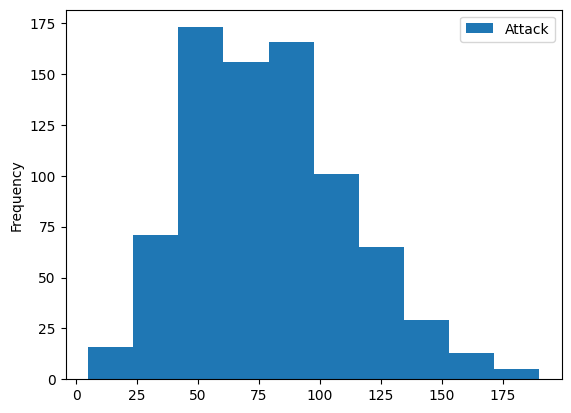

In [71]:
# We can visualize directly from Pandas

df.plot(kind="hist",y="Attack")

In [72]:
# loc vs iloc

df.loc[30, "Name"]

'Pikachu'

In [76]:
first_half = df.loc[:400]
second_half = df.loc[401:]

first_half.tail()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
396,362,Glalie,Ice,NaN,480,80,80,80,80,80,80,3,False
397,362,GlalieMega Glalie,Ice,NaN,580,80,120,80,120,80,100,3,False
398,363,Spheal,Ice,Water,290,70,40,50,55,50,25,3,False
399,364,Sealeo,Ice,Water,410,90,60,70,75,70,45,3,False
400,365,Walrein,Ice,Water,530,110,80,90,95,90,65,3,False


In [77]:
second_half.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
401,366,Clamperl,Water,NaN,345,35,64,85,74,55,32,3,False
402,367,Huntail,Water,NaN,485,55,104,105,94,75,52,3,False
403,368,Gorebyss,Water,NaN,485,55,84,105,114,75,52,3,False
404,369,Relicanth,Water,Rock,485,100,90,130,45,65,55,3,False
405,370,Luvdisc,Water,NaN,330,43,30,55,40,65,97,3,False


In [83]:
fire_types_first_twenty = df.loc[(df["Type 1"] == "Fire") | (df["Type 2"] == "Fire")].loc[10:]

fire_types_first_twenty.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
42,37,Vulpix,Fire,NaN,299,38,41,40,50,65,65,1,False
43,38,Ninetales,Fire,NaN,505,73,76,75,81,100,100,1,False
63,58,Growlithe,Fire,NaN,350,55,70,45,70,50,60,1,False
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
83,77,Ponyta,Fire,NaN,410,50,85,55,65,65,90,1,False


In [85]:
# Saving into different data frames gives me better flexibility, but at the cost of space and performance

# iloc finds data based on index
df.iloc[0:5]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [86]:
# We also use loc and iloc to filter our data

best_of_the_best = df.loc[df["Total"] >= 700]

best_of_the_best

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
418,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
420,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


In [ ]:
# Filter our columns just by indexing
best_of_the_best = best_of_the_best[["Name", "Type 1", "Type 2", "Total"]]

In [91]:
best_of_the_best

,Name,Type 1,Type 2,Total
163,MewtwoMega Mewtwo X,Psychic,Fighting,780
164,MewtwoMega Mewtwo Y,Psychic,NaN,780
268,TyranitarMega Tyranitar,Rock,Dark,700
409,SalamenceMega Salamence,Dragon,Flying,700
413,MetagrossMega Metagross,Steel,Psychic,700
418,LatiasMega Latias,Dragon,Psychic,700
420,LatiosMega Latios,Dragon,Psychic,700
422,KyogrePrimal Kyogre,Water,NaN,770
424,GroudonPrimal Groudon,Ground,Fire,770
426,RayquazaMega Rayquaza,Dragon,Flying,780


In [93]:
# Locate exact items with .at and .iat

print(df.at[5, "Total"])

405


In [95]:
# iat uses column position instead of column name
print(df.iat[4, 1])

Charmander


# Data Preprocessing and Cleaning

## Compents

- Handling Nulls
    - Replace it with default value
    - Drop them entirely
    - Average them
    - Extrapolation (o--o--i) (1--2--3)
    - Interpolation (o--i--o) ("Fire"--?--"Fire")

- Remove duplicates
    - What counts as a duplicate?
    - For pokemon what would have to be true for it to be a duplicate?
        - Type 2 must be the same
        - Type 1 must be the same
        - The same pokedex number, the same name, the same typings, but different generations?
    - Typically we just drop them.

- Transform Data
    - Normalizing(0-1)
        - value/max(value)
        - ML Models
    
    - Standardization
        - Data Types
        - Units (12/01/2024) (YYYY-MM-DD) (mi/ft/yd) -> (cm/m/km) ($) -> (GBP)

    - Encoding
        - Computers don't do well with Abstract text data
        - "One-hot encoding" Categories get exploded into booleans
            - "Type 1" -> "Fire", "Water", "Flying" : [True, False, False]

- Handling outliers
    - Detect outliers
        - Box plots, Z-scores
    - Treatment
        - Drop them
            - Temp sensors (70, 73, 72, 19)
            - Click stream (60% click the banner ad, 30% people click the subscribe button, 98% people click the hidden popup ad)
        - Ceiling/Floor on values

- Feature Engineering
    - Creating new features/insights into our data
    - Binning
        - Put all of our items into specific bins (100-300,301-500, 501-800)
    - Aggregations
        - mean; mins; maxs; std dev; delta over time
    - String manipulations
        - Getting rid of whitespace
        - Standardizing strings
            - .upper() .lower()
            - philedelphia, phialadelphia, philadefia, philidilphia
            - .loc[df["City"] == philedelphia]

- Index Manipulation
    - set_index(col)
    - reset_index()

- Time-Series Data
    - Streaming Data
    - Standardize time format (12:30) -> (12:30:00)
    - Resample data
        - entries every 30 seconds -> 1/min
    - Extracting the date/time components
        - WeekDay from the date
        - Day of the year
        - Extract the Month, day, and year into separate pieces

# Data Processing Process
1. EDA
    - Get a feel for the data and build our intuition
    - Documentation/Data Dictionary

2. Project Requirements
    - Breaking down the steps required and features needed
    - Building a data model

3. Trial and Error
    1. Make it work
    2. Make it good

In [96]:
housing = "../Data/california_housing_train.csv"

df = pd.read_csv(housing)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [115]:
pokemon = "../Data/pokemon.csv"

df = pd.read_csv(pokemon)

df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [103]:
df.set_index("Name", inplace=True)

In [104]:
df.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [105]:
df.reset_index(inplace=True)
df.head()

,Name,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [106]:
df = df.loc[::-1]

df.head()

,Name,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
799,Volcanion,721,Fire,Water,600,80,110,120,130,90,70,6,True
798,HoopaHoopa Unbound,720,Psychic,Dark,680,80,160,60,170,130,80,6,True
797,HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True
796,DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
795,Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True


In [107]:
df.tail()

,Name,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
3,VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
2,Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
1,Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
0,Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False


In [108]:
# Resetting the index, JUST resets the index
df.reset_index(inplace=True)

df.head()

,index,Name,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,799,Volcanion,721,Fire,Water,600,80,110,120,130,90,70,6,True
1,798,HoopaHoopa Unbound,720,Psychic,Dark,680,80,160,60,170,130,80,6,True
2,797,HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True
3,796,DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
4,795,Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True


In [113]:
# Resetting the index is good when data is filtered or dropped
df = df.loc[10:300]

df.reset_index(inplace=True)

df.drop(['index'], axis=1, inplace=True)
df.head()

,Name,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Trevenant,709,Ghost,Grass,474,85,110,76,65,82,56,6,False
1,Phantump,708,Ghost,Grass,309,43,70,48,50,60,38,6,False
2,Klefki,707,Steel,Fairy,470,57,80,91,80,87,75,6,False
3,Goodra,706,Dragon,NaN,600,90,100,70,110,150,80,6,False
4,Sliggoo,705,Dragon,NaN,452,68,75,53,83,113,60,6,False


In [114]:
# If columns get messed up just filter

df = df[["#", "Name", "Type 1", "Type 2", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]]
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,709,Trevenant,Ghost,Grass,474,85,110,76,65,82,56,6,False
1,708,Phantump,Ghost,Grass,309,43,70,48,50,60,38,6,False
2,707,Klefki,Steel,Fairy,470,57,80,91,80,87,75,6,False
3,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
4,705,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False


In [116]:
# Feature Engineering

# Normalize stats

# Create Columns by indexing a column that does not yet exist
df["Normal Attack"] = df["Attack"]/df["Attack"].max()

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Normal Attack
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.257895
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.326316
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.431579
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.526316
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.273684


In [117]:
df["Im a column"] = "Yay"

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Normal Attack,Im a column
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.257895,Yay
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.326316,Yay
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.431579,Yay
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.526316,Yay
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.273684,Yay


In [118]:
# Keep in mind if you use a column that exists it will just overwrite that column

df["Im a column"] = "boo"

In [119]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Normal Attack,Im a column
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.257895,boo
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.326316,boo
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.431579,boo
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.526316,boo
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.273684,boo


In [120]:
df["Generation"] = 1

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Normal Attack,Im a column
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.257895,boo
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.326316,boo
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.431579,boo
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.526316,boo
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.273684,boo


In [121]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Normal Attack,Im a column
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,1,True,0.526316,boo
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,1,True,0.842105,boo
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,1,True,0.578947,boo
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,1,True,0.842105,boo
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,1,True,0.578947,boo


In [128]:
df = pd.read_csv(pokemon)

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [123]:
# Deal with nulls

df.dropna(inplace=True)

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


In [127]:
df.fillna("Sucks", inplace=True)

df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Sucks,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Sucks,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,Sucks,314,44,48,65,50,64,43,1,False


In [132]:
df.ffill().head(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Poison,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Poison,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,Flying,314,44,48,65,50,64,43,1,False


In [136]:
# Sort

df.sort_values('Type 1', ascending=True).reset_index(drop=True).head(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,540,Sewaddle,Bug,Grass,310,45,53,70,40,60,42,5,False
1,127,Pinsir,Bug,NaN,500,65,125,100,55,70,85,1,False
2,412,Burmy,Bug,NaN,224,40,29,45,29,45,36,4,False
3,123,Scyther,Bug,Flying,500,70,110,80,55,80,105,1,False
4,595,Joltik,Bug,Electric,319,50,47,50,57,50,65,5,False
5,596,Galvantula,Bug,Electric,472,70,77,60,97,60,108,5,False
6,265,Wurmple,Bug,NaN,195,45,45,35,20,30,20,3,False
7,266,Silcoon,Bug,NaN,205,50,35,55,25,25,15,3,False
8,616,Shelmet,Bug,NaN,305,50,40,85,40,65,25,5,False
9,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False


# Aggregations

In [137]:
# In order to aggregate we will 'group by'
stats_by_type = df.groupby("Type 1").agg({"Total": ['mean', 'median'], "Attack": ['mean', 'median']})

stats_by_type.head(20)

Total             Attack       
                mean median        mean median
Type 1                                        
Bug       378.927536  395.0   70.971014   65.0
Dark      445.741935  465.0   88.387097   88.0
Dragon    550.531250  600.0  112.125000  113.5
Electric  443.409091  477.5   69.090909   65.0
Fairy     413.176471  405.0   61.529412   52.0
Fighting  416.444444  455.0   96.777778  100.0
Fire      458.076923  482.0   84.769231   84.5
Flying    485.000000  557.5   78.750000   85.0
Ghost     439.562500  464.5   73.781250   66.0
Grass     421.142857  430.0   73.214286   70.0
Ground    437.500000  440.0   95.750000   85.0
Ice       433.458333  467.5   72.750000   67.0
Normal    401.683673  415.0   73.469388   70.5
Poison    399.142857  401.5   74.678571   74.0
Psychic   475.947368  485.0   71.456140   57.0
Rock      453.750000  467.5   92.863636   95.0
Steel     487.703704  500.0   92.703704   89.0
Water     430.455357  455.0   74.151786   72.0

In [139]:
# If you have subcolumns pass in your column name as a tuple
stats_by_type.sort_values(("Total", "mean"), ascending=False).head(20)

Total             Attack       
                mean median        mean median
Type 1                                        
Dragon    550.531250  600.0  112.125000  113.5
Steel     487.703704  500.0   92.703704   89.0
Flying    485.000000  557.5   78.750000   85.0
Psychic   475.947368  485.0   71.456140   57.0
Fire      458.076923  482.0   84.769231   84.5
Rock      453.750000  467.5   92.863636   95.0
Dark      445.741935  465.0   88.387097   88.0
Electric  443.409091  477.5   69.090909   65.0
Ghost     439.562500  464.5   73.781250   66.0
Ground    437.500000  440.0   95.750000   85.0
Ice       433.458333  467.5   72.750000   67.0
Water     430.455357  455.0   74.151786   72.0
Grass     421.142857  430.0   73.214286   70.0
Fighting  416.444444  455.0   96.777778  100.0
Fairy     413.176471  405.0   61.529412   52.0
Normal    401.683673  415.0   73.469388   70.5
Poison    399.142857  401.5   74.678571   74.0
Bug       378.927536  395.0   70.971014   65.0

In [141]:
# Lists in columns are bad news bears

df['Types'] = df[['Type 1', 'Type 2']].values.tolist()

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Types
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,"[Grass, Poison]"
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,"[Grass, Poison]"
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,"[Grass, Poison]"
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,"[Grass, Poison]"
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,"[Fire, nan]"


In [142]:
df.drop(['Type 1', 'Type 2'], axis=1, inplace=True)

df.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Types
0,1,Bulbasaur,318,45,49,49,65,65,45,1,False,"[Grass, Poison]"
1,2,Ivysaur,405,60,62,63,80,80,60,1,False,"[Grass, Poison]"
2,3,Venusaur,525,80,82,83,100,100,80,1,False,"[Grass, Poison]"
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,False,"[Grass, Poison]"
4,4,Charmander,309,39,52,43,60,50,65,1,False,"[Fire, nan]"


In [143]:
# Get rid of lists with the explode function

df = df.explode('Types')

df.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Types
0,1,Bulbasaur,318,45,49,49,65,65,45,1,False,Grass
0,1,Bulbasaur,318,45,49,49,65,65,45,1,False,Poison
1,2,Ivysaur,405,60,62,63,80,80,60,1,False,Grass
1,2,Ivysaur,405,60,62,63,80,80,60,1,False,Poison
2,3,Venusaur,525,80,82,83,100,100,80,1,False,Grass


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           1600 non-null   int64 
 1   Name        1600 non-null   object
 2   Total       1600 non-null   int64 
 3   HP          1600 non-null   int64 
 4   Attack      1600 non-null   int64 
 5   Defense     1600 non-null   int64 
 6   Sp. Atk     1600 non-null   int64 
 7   Sp. Def     1600 non-null   int64 
 8   Speed       1600 non-null   int64 
 9   Generation  1600 non-null   int64 
 10  Legendary   1600 non-null   bool  
 11  Types       1214 non-null   object
dtypes: bool(1), int64(9), object(2)
memory usage: 151.6+ KB
